<a href="https://colab.research.google.com/github/rokibhasanroni07/stock-price-prediction-using-machine-learning/blob/main/Stock_Price_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Today, We will predict tesla stock price. Let's start!

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math


In [5]:
df = pd.read_csv('/content/Tesla.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3432 entries, 0 to 3431
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3432 non-null   object 
 1   Open       3432 non-null   float64
 2   High       3432 non-null   float64
 3   Low        3432 non-null   float64
 4   Close      3432 non-null   float64
 5   Adj Close  3432 non-null   float64
 6   Volume     3432 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 187.8+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [7]:
df.shape #1692 rows and 7 columns that the data frame have

(3432, 6)

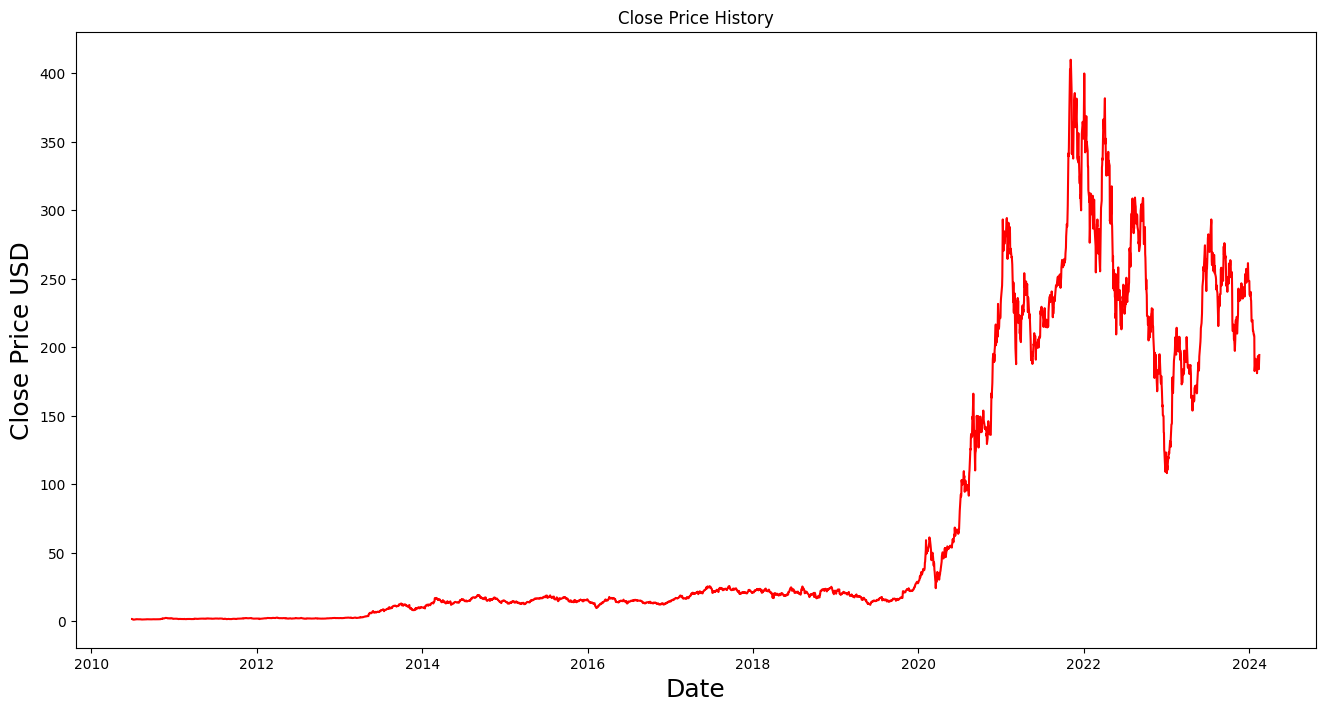

In [8]:
#plotting the data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [9]:
# create a new data frame with only 'Close column'
data = df.filter(['Close'])
dataset = data.values #convert the data frame to a numpy array
training_data_len = math.ceil(len(dataset)*.8)  # number of rows to train the model on
training_data_len

2746

In [10]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.44744244],
       [0.45891177],
       [0.47272876]])

In [11]:
#create the training dataset
#create the scaled training dataset

train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train, y_train datasets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([1.31893362e-03, 1.30915180e-03, 1.00428027e-03, 5.54310805e-04,
       5.05407544e-05, 0.00000000e+00, 2.70634579e-04, 2.60852469e-04,
       2.03792057e-04, 3.81495574e-04, 6.58652434e-04, 6.66803171e-04,
       7.89077648e-04, 9.96129534e-04, 7.33645693e-04, 7.20604046e-04,
       8.47769140e-04, 8.95047734e-04, 8.39618402e-04, 7.74404629e-04,
       8.02119295e-04, 7.41799054e-04, 6.74953909e-04, 8.34727493e-04,
       1.00264919e-03, 8.90156824e-04, 7.58100530e-04, 6.17893497e-04,
       6.19524578e-04, 5.26596139e-04, 3.42368009e-04, 2.93458335e-04,
       4.10841611e-04, 4.85837203e-04, 5.46160067e-04, 4.84206122e-04,
       4.87468283e-04, 5.38006705e-04, 7.05931027e-04, 5.54310805e-04,
       6.68434252e-04, 6.43979415e-04, 6.35826345e-04, 6.63543343e-04,
       5.99960650e-04, 7.58100530e-04, 8.57551250e-04, 8.55919878e-04,
       7.72773549e-04, 8.31465041e-04, 8.00490546e-04, 7.12453017e-04,
       8.02119295e-04, 8.67333068e-04, 1.00754010e-03, 8.37987322e-04,
     

In [12]:
#convert the x_train and y_train  to numppy array
x_train,y_train = np.array(x_train), np.array(y_train)

In [13]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2686, 60, 1)

In [14]:
#Buil the LSTM model
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
2686/2686 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0012
Epoch 2/10
2686/2686 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 3.0977e-04
Epoch 3/10
2686/2686 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 4.7603e-04
Epoch 4/10
2686/2686 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 1.6326e-04
Epoch 5/10
2686/2686 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 1.6549e-04
Epoch 6/10
2686/2686 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 1.2297e-04
Epoch 7/10
2686/2686 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 2.2369e-04
Epoch 8/10
2686/2686 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 7.8050e-05
Epoch 9/10
2686/2686 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 1.3251e-04
Epoch 10/10
2686/2686 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 1.0638e-04


In [17]:
#create the testing data sets
#create a new array containing scale values from index 1543 to 2003
test_data= scaled_data[training_data_len-60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [18]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [19]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(686, 60, 1)

In [20]:
#predicting the data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [21]:
#get the root mean square error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

np.float64(0.9188226972307477)

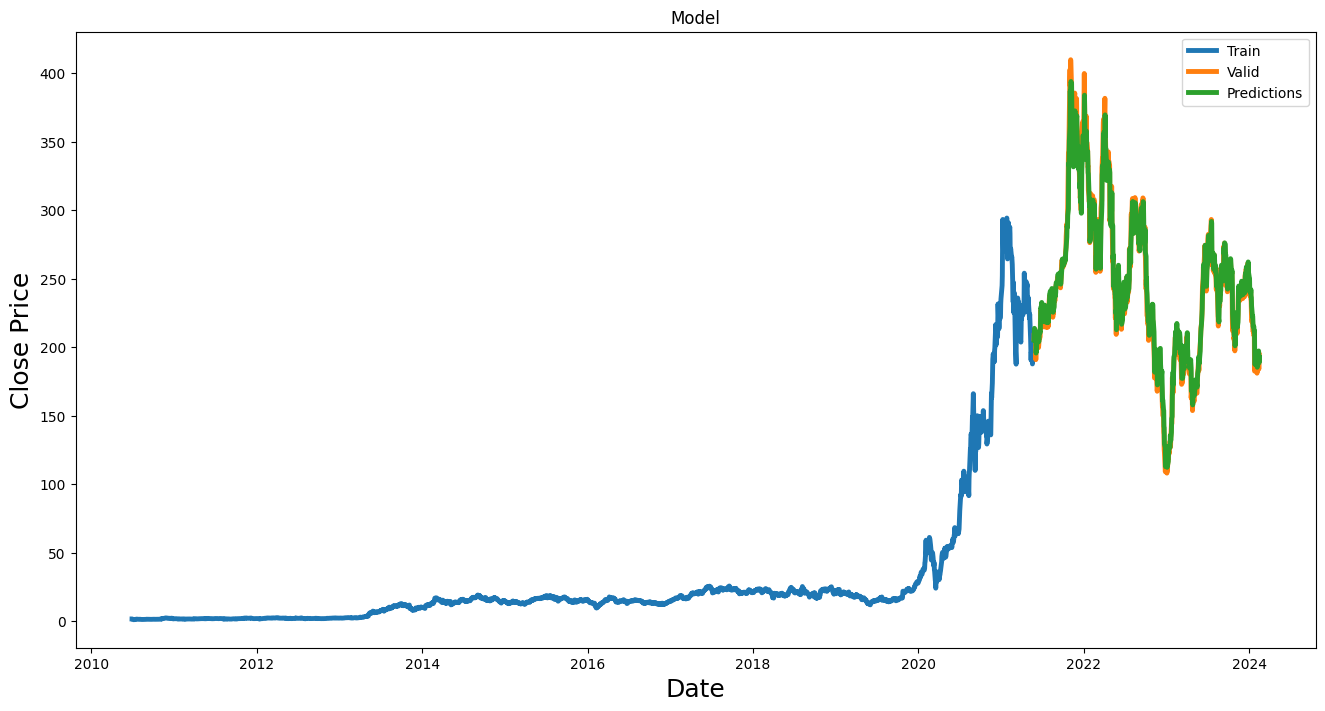

In [22]:
#plot the data
train = data[:training_data_len].copy()
valid = data[training_data_len:].copy()
valid['Predictions'] = predictions
#Visialization the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='upper right')
plt.show()

In [23]:
#show the valid and predicted price
valid

,Close,Predictions
Date,,
2021-05-26,206.376663,205.246719
2021-05-27,210.283340,210.002655
2021-05-28,208.406662,213.832520
2021-06-01,207.966660,212.392410
2021-06-02,201.706665,212.026031
...,...,...
2024-02-09,193.570007,193.354202
2024-02-12,188.130005,197.318207
2024-02-13,184.020004,192.520111


from matplotlib import pyplot as plt
_df_0['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Predictions'].plot(kind='hist', bins=20, title='Predictions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Close', y='Predictions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Predictions']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Predictions')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
_df_7['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Predictions'].plot(kind='line', figsize=(8, 4), title='Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

In [31]:
#get the quote
tesla_quote = pd.read_csv('/content/Tesla.csv')
#Create new data frame
new_df = tesla_quote.filter(['Close'])
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scaled the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
#get the predicted scaled price
pred_price= model.predict(X_test)
#undo the scalling
pred_price = scaler.inverse_transform(pred_price)
print("Predicted stock price: ", pred_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted stock price:  [[197.97993]]


If you like it please vote:)